In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes = True)

import matplotlib.pyplot as plt

/Users/akashbudholia/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from numpy.random import seed
import tensorflow as tf
from tensorflow import set_random_seed

tf.logging.set_verbosity(tf.logging.ERROR)

/Users/akashbudholia/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/akashbudholia/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/akashbudholia/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/akashbudholia/opt/anaconda3/lib/python3

In [3]:
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector

Using TensorFlow backend.


In [4]:
from keras.models import Model
from keras import regularizers

In [5]:
seed(10)

set_random_seed(10)

In [20]:
data_dir = '/Users/akashbudholia/Desktop/data/Bearing_Sensor_Data/'

merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep = '\t', header = None)
    dataset_mean_abs = np.array(dataset.abs().mean())
    data1 = np.hstack(dataset_mean_abs)
    dataset_mean_abs = pd.DataFrame(data1.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)
    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
    


In [22]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')

merged_data = merged_data.sort_index()

(982, 4)


In [24]:
train = merged_data['2004-02-12 10:52:39': '2004-02-15 12:52:39']

test = merged_data['2004-02-15 12:52:39':]

print(train.shape)

print(test.shape)

(445, 4)
(538, 4)


/Users/akashbudholia/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


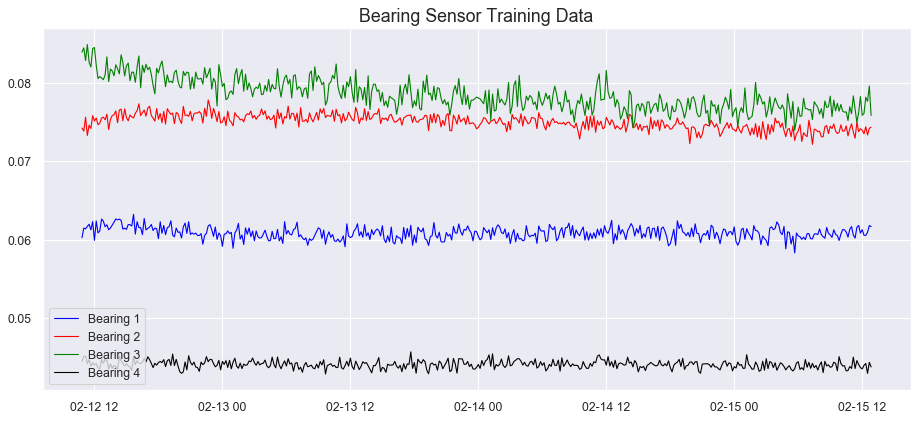

In [26]:
fig, ax = plt.subplots(figsize = (14,6), dpi = 80)

ax.plot(train['Bearing 1'], label = 'Bearing 1', color = 'blue', animated = True, linewidth = 1)

ax.plot(train['Bearing 2'], label = 'Bearing 2', color = 'red', animated = True, linewidth = 1)

ax.plot(train['Bearing 3'], label = 'Bearing 3', color = 'green', animated = True, linewidth = 1)

ax.plot(train['Bearing 4'], label = 'Bearing 4', color = 'black', animated = True, linewidth = 1)

plt.legend(loc = 'lower left')

ax.set_title('Bearing Sensor Training Data', fontsize = 16)

plt.show()                       

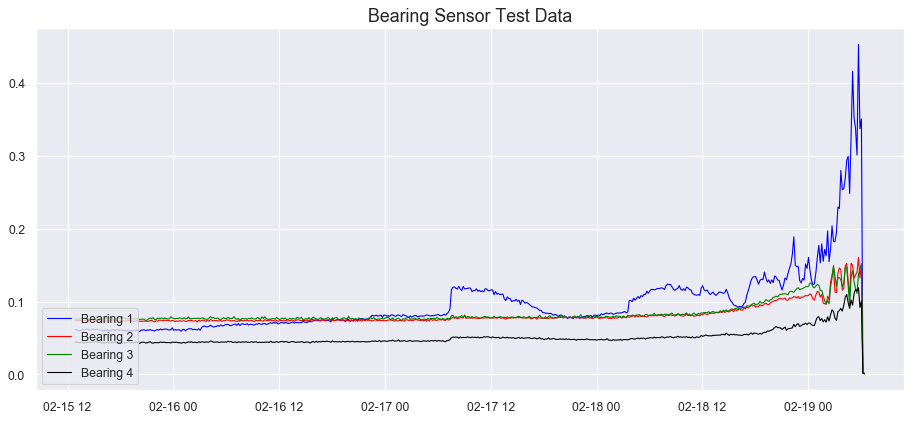

In [28]:
fig, ax = plt.subplots(figsize = (14,6), dpi = 80)

ax.plot(test['Bearing 1'], label = 'Bearing 1', color = 'blue', animated = True, linewidth = 1)

ax.plot(test['Bearing 2'], label = 'Bearing 2', color = 'red', animated = True, linewidth = 1)

ax.plot(test['Bearing 3'], label = 'Bearing 3', color = 'green', animated = True, linewidth = 1)

ax.plot(test['Bearing 4'], label = 'Bearing 4', color = 'black', animated = True, linewidth = 1)

plt.legend(loc = 'lower left')

ax.set_title('Bearing Sensor Test Data', fontsize = 16)

plt.show()  

In [29]:
#Converting the Signal from Time Domain to Frequency Domain


train_fft = np.fft.fft(train)

test_fft = np.fft.fft(test)

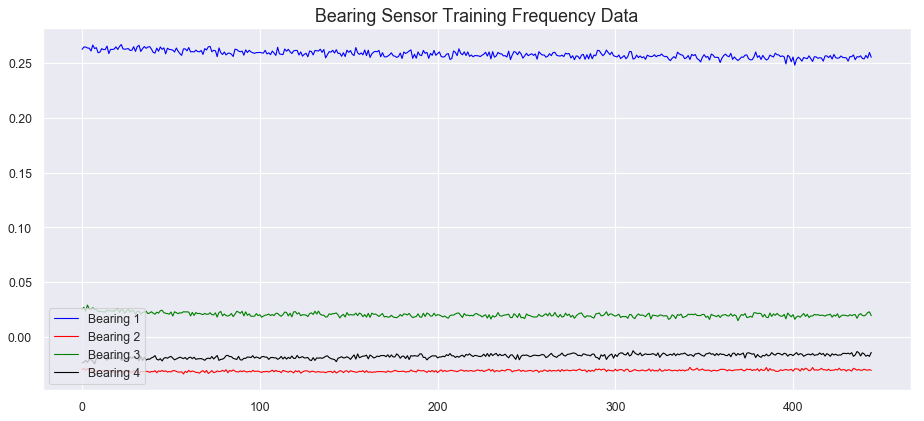

In [31]:
fig, ax = plt.subplots(figsize = (14,6), dpi = 80)

ax.plot(train_fft[:,0].real, label = 'Bearing 1', color = 'blue', animated = True, linewidth = 1)

ax.plot(train_fft[:,1].imag, label = 'Bearing 2', color = 'red', animated = True, linewidth = 1)

ax.plot(train_fft[:,2].real, label = 'Bearing 3', color = 'green', animated = True, linewidth = 1)

ax.plot(train_fft[:,3].real, label = 'Bearing 4', color = 'black', animated = True, linewidth = 1)

plt.legend(loc = 'lower left')

ax.set_title('Bearing Sensor Training Frequency Data', fontsize = 16)

plt.show()  

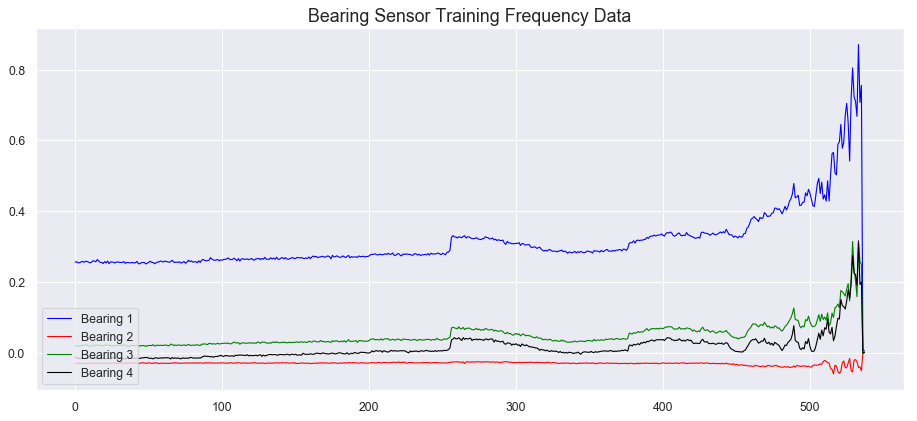

In [32]:
fig, ax = plt.subplots(figsize = (14,6), dpi = 80)

ax.plot(test_fft[:,0].real, label = 'Bearing 1', color = 'blue', animated = True, linewidth = 1)

ax.plot(test_fft[:,1].imag, label = 'Bearing 2', color = 'red', animated = True, linewidth = 1)

ax.plot(test_fft[:,2].real, label = 'Bearing 3', color = 'green', animated = True, linewidth = 1)

ax.plot(test_fft[:,3].real, label = 'Bearing 4', color = 'black', animated = True, linewidth = 1)

plt.legend(loc = 'lower left')

ax.set_title('Bearing Sensor Training Frequency Data', fontsize = 16)

plt.show()  

In [33]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(train)

X_test = scaler.transform(test)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [36]:
print(X_test.shape)

print(X_train.shape)

(538, 1, 4)
(445, 1, 4)


In [38]:
# Defining The AutoEncoder Model

def autoencoder_model(X):
    
    inputs = Input(shape = (X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences= True,
             kernel_regularizer= regularizers.l2(0.00))(inputs)
    
    L2 = LSTM(4, activation='relu', return_sequences= False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation= 'relu', return_sequences= True)(L3)
    L5 = LSTM(16, activation= 'relu', return_sequences=True)(L4)
     
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    
    model = Model(inputs = inputs, outputs = output)
    
    return model

In [39]:
model = autoencoder_model(X_train)

model.compile(optimizer = 'adam', loss = 'mae')

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 4)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 4)              0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 4)              68  

In [40]:
nb_epochs = 100
batch_size = 10

history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size = batch_size, 
                    validation_split= 0.05).history

Train on 422 samples, validate on 23 samples
Epoch 1/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4473 - val_loss: 0.3245
Epoch 2/100
422/422 [==============================] - 0s 297us/step - loss: 0.3901 - val_loss: 0.2583
Epoch 3/100
422/422 [==============================] - 0s 305us/step - loss: 0.3124 - val_loss: 0.1799
Epoch 4/100
422/422 [==============================] - 0s 284us/step - loss: 0.2065 - val_loss: 0.1584
Epoch 5/100
422/422 [==============================] - 0s 288us/step - loss: 0.1278 - val_loss: 0.1400
Epoch 6/100
422/422 [==============================] - 0s 291us/step - loss: 0.1085 - val_loss: 0.1229
Epoch 7/100
422/422 [==============================] - 0s 288us/step - loss: 0.1041 - val_loss: 0.1191
Epoch 8/100
422/422 [==============================] - 0s 287us/step - loss: 0.1027 - val_loss: 0.1152
Epoch 9/100
422/422 [==============================] - 0s 288us/step - loss: 0.1020 - val_loss: 0.1145
Epoch 10/100
422/422 [========

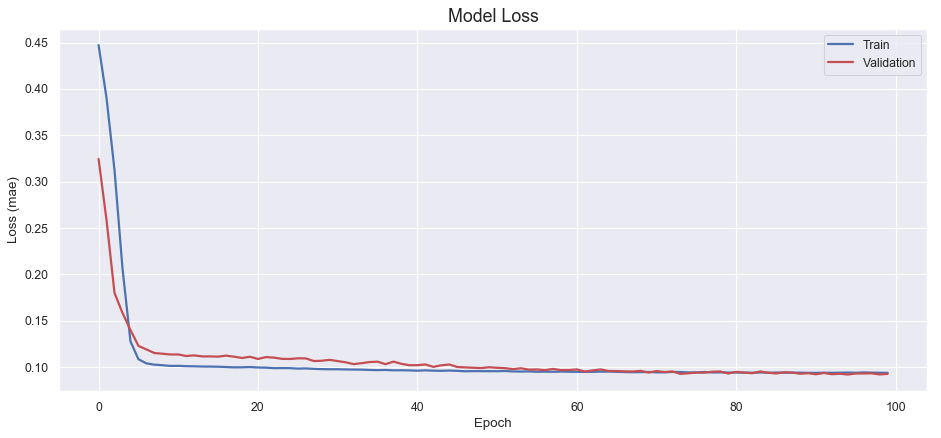

In [41]:
fig, ax = plt.subplots(figsize = (14,6), dpi = 80)

ax.plot(history['loss'], 'b', label = 'Train', linewidth = 2)

ax.plot(history['val_loss'], 'r', label = 'Validation', linewidth = 2)

ax.set_title('Model Loss', fontsize = 16)

ax.set_ylabel('Loss (mae)')

ax.set_xlabel('Epoch')

ax.legend(loc = 'upper right')

plt.show()

(0.0, 0.5)

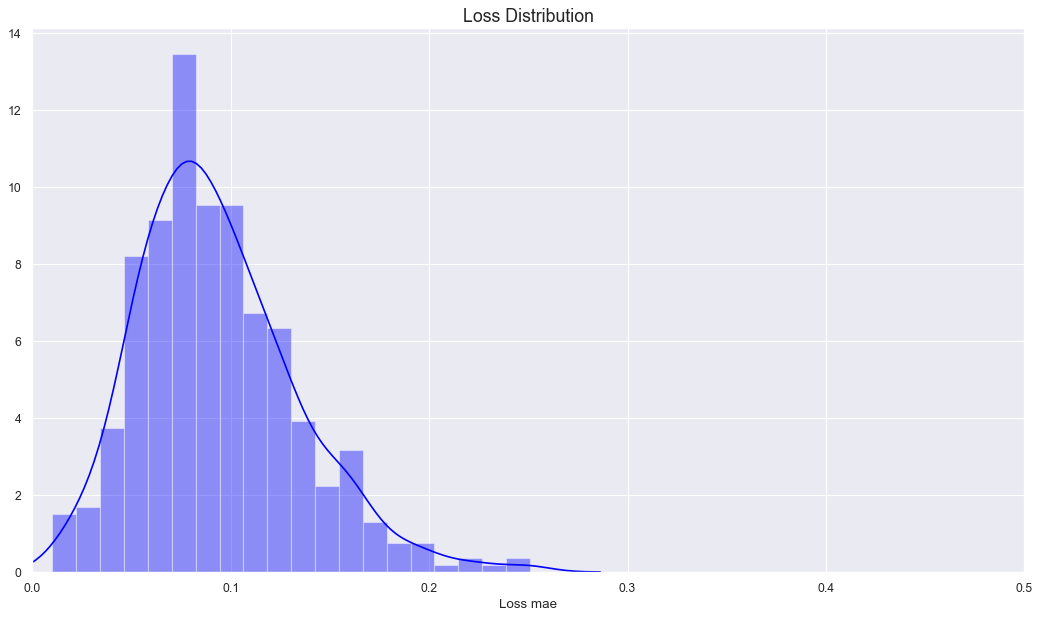

In [42]:
X_pred = model.predict(X_train)

X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])

X_pred = pd.DataFrame(X_pred, columns = train.columns)

X_pred.index = train.index

scored = pd.DataFrame(index = train.index)

Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])

scored['Loss mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)

plt.figure(figsize=(16,9), dpi = 80)

plt.title('Loss Distribution', fontsize = 16)

sns.distplot(scored['Loss mae'], bins = 20, kde = True, color = 'blue');

plt.xlim([0.0, 0.5])



In [44]:
X_pred = model.predict(X_test)

X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])

X_pred = pd.DataFrame(X_pred, columns = test.columns)

X_pred.index = test.index


scored = pd.DataFrame(index = test.index)

Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])

scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)

scored['Threshold'] = 0.275

scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']

scored.head()

,Loss_mae,Threshold,Anomaly
2004-02-15 12:52:39,0.093960,0.275,False
2004-02-15 13:02:39,0.177644,0.275,False
2004-02-15 13:12:39,0.069466,0.275,False
2004-02-15 13:22:39,0.047336,0.275,False
2004-02-15 13:32:39,0.043788,0.275,False


In [46]:
X_pred_train = model.predict(X_train)

X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])

X_pred_train = pd.DataFrame(X_pred_train, columns = train.columns)

X_pred_train.index = train.index

In [47]:
scored_train = pd.DataFrame(index = train.index)

scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train- Xtrain), axis = 1)

scored_train['Threshold'] = 0.275

scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

scored = pd.concat([scored_train, scored])

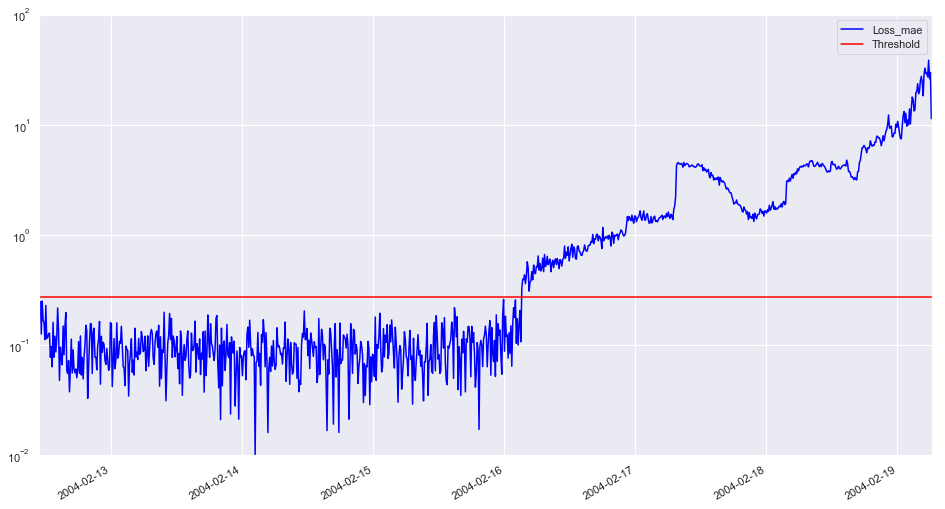

In [48]:
scored.plot(logy = True, figsize = (16,9), ylim = [1e-2, 1e2], color = ['blue', 'red'])

In [50]:
# save the Model for Deployment

model.save('Cloud_Model.h5')
print('Model saved successfully')

Model saved successfully
